# Toronto Neighbourhoods Analysis using ML, Plotly


## I- Introduction
- Inspiration from an article ‘Should I Stay or Should I Go? ’ International Students Decision-Making About Staying in Canada’[https://link.springer.com/article/10.1007/s12134-021-00825-1 1]. This article recalls the similar question for Vietnamese students who study and live in Finland- the country I am in now or other country- Should I stay here or return home? What the awesome factors here I need and can not get it if I get home? Are these factors really what I need?

### 1.	Problem 
The City of Toronto has 140 neighbourhoods spanning 6 districts. As a new immigrant, a vital question to answer is “What neighbourhood do I settle in?”. The purpose of this project is to group Toronto neighbourhoods in order of desirability using Machine Learning and Data Visualization techniques.

### 2.	Basis
There are several factors to consider when settling down in any location. For this project, I performed my analysis using the following criteria:
•	-**Total number of Essential Venues** in each neighbourhood
•	-**Primary and Secondary Benchmarks**: Primary benchmarks considered were Unemployment rate, Crime rate and COVID-19 rates for each neighbourhood while the Secondary benchmark was housing price for a one-bedroom apartment in each neighbourhood.





## Contents

[1. Import Libraries](#1.-Import-Libraries)

[2. Import Neighbourhoods Datasets](#2.-Import-Neighbourhoods-Datasets)

[3. Data Cleaning](#3.-Data-Cleaning)   

[4. Data Exploration](#4.-Data-Exploration)

[5. Toronto Neighbourhoods Venues Data Mining](#5.-Toronto-Neighbourhoods-Venues-Data-Mining)

[6. Analyzing Toronto Neighbourhoods & Venues](#6.-Analyzing-Toronto-Neighbourhoods-&-Venues)

[7. Machine Learning Algorithm (k-Means)](#7.-Machine-Learning-Algorithm-(k-Means))

[8. Clustering Neighbourhoods by Total number of Essential Venues](#8.-Clustering-Neighbourhoods-by-Total-number-of-Essential-Venues)

[9. Visualizing Toronto Neighbourhoods Clusters](#9.-Visualizing-Toronto-Neighbourhoods-Clusters)

[10. Import and Clean Primary Benchmarks Datasets](#10.-Import-and-Clean-Primary-Benchmarks-Datasets)

[11. Clustering Neighbourhoods by Primary Benchmarks](#11.-Clustering-Neighbourhoods-by-Primary-Benchmarks)

[12. Clustering using Secondary Benchmark (Housing Prices)](#12.-Clustering-using-Secondary-Benchmark-(Housing-Prices))

[13. Final Results and Visualizations](#13.-Final-Results-and-Visualizations)

## 1. Import Libraries

Import below needed libraries. The hardest library to install is geocoder. Follow steps from following link to install that:https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b
Initializing via using dictionaries:


In [ ]:
import numpy as np 
import pandas as pd  # For data analysis tasks
pd.set_option('display.max_columns', None) #set_option(): isplay-related options for user to adjust.
                                           #  sets the maximum number of rows and columns displayed when a frame is pretty-printed
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format #Display Pandas dataframe of floats using a format string 
from pandas.io.json import json_normalize  # convert JSON file into a pandas dataframe
                                           # 'Normalize' is semi-structured JSON data into a flat table

from sklearn.cluster import KMeans

import geocoder  # Use geocoder to Geocoder to convert physical address to latitude and longitude.
import plotly.express as px # to visualize a variety of data types. Use function 'px'.
import geopandas as gpd # to work with geospatial data 
import chart_studio
import chart_studio.plotly as py # to export Plotly to Chart Studio
import plotly.graph_objects as go # to contains all class definitions for the objects that make up the plots we see 
import plotly.io as pio # Plotly renderer, a low-level interface for displaying, reading and writing figures.
import matplotlib.pyplot as plt # for visualizations
import datapane as dp # to build interactive reports for the end-users in seconds
from plotly.subplots import make_subplots # to make multiple Plotly plots in one instance, to construct figures with arbitrary subplots.

import plotly.offline as pyo # to make a standalone saved locally and opened in your web browser.
pyo.init_notebook_mode()     # Set notebook mode to work in offline, 

print('Libraries imported.')

## 2. Import Neighbourhoods Datasets

140 Toronto neighbourhoods and IDs of their Neighbourhoods  were imported to the notebook. The GeoJSON file was also imported and converted to a Pandas dataframe.

In [ ]:
toronto_df = pd.read_excel(
    r'\C:\Users\ttpli\Toronto COVID19_Neighbour.xlsx',
    sheet_name='All Cases and Rates by Neighbou') # Get sheet names of 'All Cases and Rates by Neighbou'  
                                                # from the wholeworkbook 'Toronto COVID19_Neighbour'
toronto_geo = r'\C:\Users\ttpli\Neighbourhoods.geojson.xlsx',  

print('Datasets downloaded')

## 3. Data Cleaning

1- Missing values were removed and become empty now. They are not the most important data so the dat of 140 neighbourhoods is fine  and not be affected. The relevant data here are **Neighbourhood ID and Name columns**. 
2- **Neighbourhood ID** is the primary key

### Cleaning Neighbourhoods dataset

In [3]:
toronto_df.dropna(axis=0, inplace=True) # dropna() removes the rows that contains NULL values
toronto_df = toronto_df.astype({"Neighbourhood ID": int}) # Change "Neighbourhood ID" to Integer data type
toronto_df.head() # Display top 5 rows

,Neighbourhood ID,Neighbourhood Name
0,138,Eglinton East
1,47,Don Valley Village
2,38,Lansing-Westgate
3,9,Edenbridge-Humber Valley
4,44,Flemingdon Park


### Cleaning Geopandas Dataframe

In [4]:
toronto_gdf = gpd.read_file(toronto_geo) # Read GEOJSON file to a Geopandas dataframe
toronto_gdf.head() # Display initial dataframe to see what outcome is

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,8261,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.43,43.68,16491505,"3,217,959.61","7,515.78","POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,8262,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.40,43.70,16491521,"3,160,333.99","7,872.02","POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,8263,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.40,43.69,16491537,"2,222,464.27","8,130.41","POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,8264,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.49,43.77,16491553,"25,418,210.12","25,632.34","POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,8265,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.46,43.71,16491569,"11,566,687.56","13,953.41","POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [5]:
toronto_gdf = toronto_gdf.iloc[:, 5:]  # Slice dataframe for only relevant attributes
toronto_gdf.rename(columns={'AREA_LONG_CODE': 'Neighbourhood ID'},
                   inplace=True)  # Rename Area_Long_Code as it is same as Neighbourhood ID
toronto_gdf.drop(labels=['AREA_DESC', 'OBJECTID', 'X', 'Y', 'AREA_NAME'],
                 axis=1, inplace=True) # Drop irrelevant columns
toronto_gdf.head() # Display top 5 rows

,Neighbourhood ID,LONGITUDE,LATITUDE,Shape__Area,Shape__Length,geometry
0,94,-79.43,43.68,"3,217,959.61","7,515.78","POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,100,-79.40,43.70,"3,160,333.99","7,872.02","POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,97,-79.40,43.69,"2,222,464.27","8,130.41","POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,27,-79.49,43.77,"25,418,210.12","25,632.34","POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,31,-79.46,43.71,"11,566,687.56","13,953.41","POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


### Merge Geopandas and Neighbourhoods Dataset
The Geopandas dataframe and the Neighbourhoods dataset were merged into one Geopandas dataframe. This dataframe was very important for map visualizations on Plotly

In [ ]:
toronto_gdf=toronto_gdf.merge(toronto_df,
                              on='Neighbourhood ID') # Merge(dataframe.merge(right, how, on,
                            #left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate))
cols = toronto_gdf.columns.tolist() # tolist() method is toconvert a Dataframe Column(a Pandas Series) to a List.
cols = cols[-1:] + cols[:-1] # Shift last column of dataframe to first column
toronto_gdf=toronto_gdf[cols] # Reorder columns in the Geopandas dataframe
toronto_gdf.head() # Display top 5 rows

## 4. Data Exploration

In this section, I used Geopy library to obtain the coordinates for Toronto and made a scatter map of all the 140 neighbourhoods.

In [ ]:
Using library Geopy to get suitable coordinates ofrom addresses or place names. Then I make a scatter map of these places.

In [7]:
from geopy.geocoders import Nominatim # match address with coordinates(latitude and longitude)

address = 'Toronto' # Place name that we needs to get coordinates
geolocator = Nominatim(user_agent="toronto_explorer") # User_Agent argument, an http request header 
                                                      # needs to be set to your application name
location = geolocator.geocode(address) #geocode(): convert a list fo address into a map
tor_lat = location.latitude # store longitude value
tor_lon = location.longitude # store latitude value

print(tor_lat,tor_lon )

43.6534817 -79.3839347


In [8]:
mapbox_accesstoken='pk.eyJ1IjoiZXhhbXBsZXMiLCJhIjoiY2lqbmpqazdlMDBsdnRva284cWd3bm11byJ9.V6Hg2oYJwMAxeoR9GEzkAA'


In [ ]:
accesstoken = mapbox_accesstoken  

# Scatter Mapbox Initialization from Plotly Express
tor_map = px.scatter_mapbox(toronto_gdf, # gdf: Geopandas dataframe
                            lat="LATITUDE", 
                            lon="LONGITUDE", 
                            hover_name="Neighbourhood Name",
                            hover_data=["Neighbourhood ID"], # Add data to hover frame
                            color_discrete_sequence=["blue"], 
                            center={
                                'lat': tor_lat,
                                'lon': tor_lon
                            },
                            zoom=9, 
                            height=400,
                            title="Map of Toronto and its 140 Neighbourhoods")
tor_map.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0}) # set margins of plot
tor_map.update_layout(mapbox_style="streets",
                      mapbox=dict(bearing=-15, accesstoken=MAPBOX_ACCESSTOKEN))

tor_map.show() # Render map

## 5. Toronto Neighbourhoods Venues Data Mining

## 5. Data Mining of the venues


In [ ]:
To get Topn 100 venues of each neighbourhood, API from Foursquare and my user credentials are used. My credentials are stored into variables:CLIENT_ID, CLIENT_SECRET, LIMIT  

In [10]:
Foursquare website ID, Secret Key, API version, API limit value

In [11]:
CLIENT_ID = 'PJK5H0PHLZOLSB3TJVS44YE5PQDTFS44BZP3WIDP31HS1REN' 
CLIENT_SECRET = 'PSPH5UCW1Y5OTU44JQI5BGBM31MQULBMEJJ2NPGZJZ0HT2X4' 
VERSION = '20220629' # Foursquare API version format = YYYYMMDD
LIMIT = 100 

### Define Function to obtain all Venues in each neighbourhood

In [ ]:
### Function to get venues/places

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

        # GET request: response.json(), requests.get(url, params={key: value}, args)
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return relevant information for every nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'],
                             v['venue']['categories'][0]['name'])
                            for v in results])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood Name', 'Neighbourhood Latitude',
        'Neighbourhood Longitude', 'Venue', 'Venue Category']

    return (nearby_venues)

In [13]:
# Use the function created above to obtain Venues and Venue Catgories for each Neighbourhood
toronto_venues = getNearbyVenues(names=toronto_gdf['Neighbourhood Name'],
                                 latitudes=toronto_gdf['LATITUDE'],
                                 longitudes=toronto_gdf['LONGITUDE'])
toronto_venues.head()

,Neighbourhood Name,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Wychwood,43.68,-79.43,Wychwood Barns Farmers' Market,Farmers Market
1,Wychwood,43.68,-79.43,Wychwood Barns,Event Space
2,Wychwood,43.68,-79.43,Hillcrest Park,Park
3,Wychwood,43.68,-79.43,Annabelle Pasta Bar,Italian Restaurant
4,Wychwood,43.68,-79.43,Bob Coffee Bar,Coffee Shop


In [14]:
print('{} unique neighbourhoods were returned with >1 venues'.format(
    toronto_venues['Neighbourhood Name'].nunique()))
print('{} venues were returned'.format(toronto_venues.shape[0]))

138 unique neighbourhoods were returned with >1 venues
2117 venues were returned


Juat only 138 neighbourhoods were returned. Using "Left Join" to check which neighbourhoods were not returned. They are St.Andrew-Windfields and Willowridge-Martingrove-Richview.

### Data Mining Result

In [16]:
tor_count = toronto_venues.groupby(
    'Neighbourhood Name').count()  # Group Neighbourhoods and return count of all venues
tor_count.reset_index(inplace=True)
print('There are {} unique categories.'.format(
    len(toronto_venues['Venue Category'].unique())))
print('The least number of venues for a Neighbourhood is {}.'.format(
    tor_count['Venue Category'].min()))
print('The most number of venues for a Neighbourhood is {}.'.format(
    tor_count['Venue Category'].max()))
print('These are the neighbourhoods with least venues:\n{} '.format(
    tor_count['Neighbourhood Name'][tor_count['Venue Category'] == 1]))

There are 291 unique categories.
The least number of venues for a Neighbourhood is 1.
The most number of venues for a Neighbourhood is 100.
These are the neighbourhoods with least venues:
18     Brookhaven-Amesbury
54           Humber Summit
61            Kennedy Park
64          Kingsway South
86        Newtonbrook West
112    Stonegate-Queensway
128        Willowdale East
Name: Neighbourhood Name, dtype: object 


## 6. Analyzing Toronto Neighbourhoods & Venues

### One-hot Encoding
It is used to convert venue categories to numerical formats for each neighbourhood

In [17]:
# One hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']],
                                prefix="",
                                prefix_sep="") # Remove Prefix 'Venue Category' from column names

# Put columns of  neighborhood name back to dataframe
toronto_onehot['Neighbourhood Name'] = toronto_venues['Neighbourhood Name']

# Switch neighborhood column to the first column
neigh = toronto_onehot['Neighbourhood Name']
toronto_onehot.drop(labels=['Neighbourhood Name'], axis=1, inplace=True)
toronto_onehot.insert(0, 'Neighbourhood Name', neigh)
toronto_onehot.head()

,Neighbourhood Name,African Restaurant,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Tr

In [18]:
# Group up, then sum up Venue categories for each neighbourhood
toronto_grouped = toronto_onehot.groupby('Neighbourhood Name').sum().reset_index()
toronto_grouped.head()

,Neighbourhood Name,African Restaurant,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Tr

### Analysis of Top Venues 
The target of this part is to get categories of vanues with the highest frequency

In [19]:
# Coppy the toronto_grouped dataframe for further analysis
tem = toronto_grouped.copy(deep=True)  
# Avoid changes being made to the original dataframe
tem.head()

,Neighbourhood Name,African Restaurant,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Quad,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,South Indian Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Tr

In [20]:
# Transpose the dataframe above by removing the Neighbourhood name
tem.rename(columns={'Neighbourhood Name':''},inplace=True)
tem=tem.set_index('').T # Transpose function
tem.reset_index(inplace=True) #set Dataframe index
tem.rename(columns={'index':'Venues','Neighbourhood Name':''},inplace=True) # Rename columns
tem['Total'] = tem.sum(axis=1) # Sum of venue catrgories
tem=tem[['Venues','Total']] # Slice dataframe to show only relevant columns
tem=tem.sort_values(by='Total', ascending=False) # Sort out venue categories in descending order
tem.head() # Display top 5 rows

,Venues,Total
64,Coffee Shop,157
203,Park,84
49,Café,82
212,Pizza Place,79
234,Sandwich Place,62


### Visualizing Top Venues 
Using Plotly Express Library. Choosing legend value to seperate a category.

In [21]:
# make a copy of the toronto_grouped dataframe again
tem2=toronto_grouped.copy(deep=True)
tem2['Total']=tem2.sum(axis=1)
tem2=tem2[['Neighbourhood Name','Total']] # Slice dataframe
tem2=tem2.sort_values(by='Total', ascending=False) # Sort Neighbourhood name in descending order
tem2.head(10)

,Neighbourhood Name,Total
23,Church-Yonge Corridor,100
6,Bay Street Corridor,76
83,Mount Pleasant West,72
34,Dufferin Grove,68
59,Junction Area,58
62,Kensington-Chinatown,58
135,Yonge-St.Clair,55
19,Cabbagetown-South St. James Town,51
97,Playter Estates-Danforth,51
68,Lawrence Park North,48


In [22]:
topvenues_barchart = px.bar(tem2.query("Total>48"),
                            x="Neighbourhood Name",
                            y="Total", 
                            color="Neighbourhood Name")

topvenues_barchart.update_layout(title = 'Toronto Neighbourhoods with most venues',
                         margin={"r":0,"t":30,"l":0,"b":0})

topvenues_barchart.update_xaxes(showticklabels=False) # Removed tick labels as it was too long
topvenues_barchart.show() # Display plot

### Extracting Relevant/Essential Venue Categories
Extract all **essential venues** from the larger dataset 'toronto_grouped'. These venues includes features: Restaurants, Bus Station, Bus Stop, Convenience Store, Bank, Train Station, Park, Playground, School, Discount Store, Metro Station, Shopping Malls

In [23]:
# Filter all Restaurant sub-categories into one dataframe 'temp'
temp=toronto_grouped[toronto_grouped.filter(regex='Restaurant|Neighbourhood Name').columns].copy(deep=True)
temp.head()

,Neighbourhood Name,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt North,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Agincourt South-Malvern West,0,0,0,1,0,0,0,1,0,6,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Banbury-Don Mills,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
temp['Restaurant'] = temp.sum(axis=1) # Obtain sum of all restaurants per neighbourhood
temp=temp[['Neighbourhood Name', 'Restaurant']] # Slice dataframe 
# Extract the rest of  essential venue categories to one dataframe
toronto_venues_sorted = toronto_grouped.loc[:,
                                            ('Neighbourhood Name',
                                             'Bus Station', 'Bus Stop',
                                             'Convenience Store', 'Bank',
                                             'Train Station', 'Park',
                                             'Playground', 'School',
                                             'Discount Store', 'Metro Station',
                                             'Shopping Mall')]

# Merge Restaurants and other essential venue categories 
toronto_venues_sorted = toronto_venues_sorted.merge(temp,
                                                    on='Neighbourhood Name')
toronto_venues_sorted.head() # Display 1st 5 rows

,Neighbourhood Name,Bus Station,Bus Stop,Convenience Store,Bank,Train Station,Park,Playground,School,Discount Store,Metro Station,Shopping Mall,Restaurant
0,Agincourt North,0,0,1,1,0,1,0,0,1,0,0,4
1,Agincourt South-Malvern West,0,0,0,1,0,0,0,0,0,0,2,14
2,Alderwood,0,0,1,0,0,0,0,0,0,0,0,0
3,Annex,0,0,0,0,0,2,0,0,0,0,0,3
4,Banbury-Don Mills,0,0,0,1,0,0,0,0,0,0,1,2


### Analysis of  Neighbourhoods and essential venue categories

In [26]:
# Calulate total number of essential venues per neighbourhood
toronto_venues_sorted['Total']=toronto_venues_sorted.sum(axis=1)
# Create new dataframe to store all neighbourhoods and their total number of essential venues
total_venues=toronto_venues_sorted[['Neighbourhood Name','Total']]
total_venues.sort_values(by=['Total'], ascending=False).head()

,Neighbourhood Name,Total
83,Mount Pleasant West,28
23,Church-Yonge Corridor,27
135,Yonge-St.Clair,23
6,Bay Street Corridor,23
62,Kensington-Chinatown,20


## 7. K-Means

_**K-Means**_ is an Unsupervised Machine Learning algorithm that groups data into k number of clusters that groupss the neighbourhoods into “k” (with similar characteristics or qualities).Steps that algorithm works:
* (i) Determines most optimal k (i.e. no of clusters)
* (ii)Initializes k such that initial means are randomly generated within the data domain
* (iii)Creates k clusters by associating every observation with the nearest mean
* (iv)The centroid of each of the k clusters becomes the new mean
 Steps (iii and iv) are repeated until convergence is reached such that all data points belong to a cluster that are significantly distinct from one another


### Optimum number of Clusters (Elbow Method)
In this method, the dataset is fit with the k-means model for a range of values (1-10). The distortions for each value of k is stored and then plotted on a line chart. The point of inflection is a good indication that the model fits best at that point.

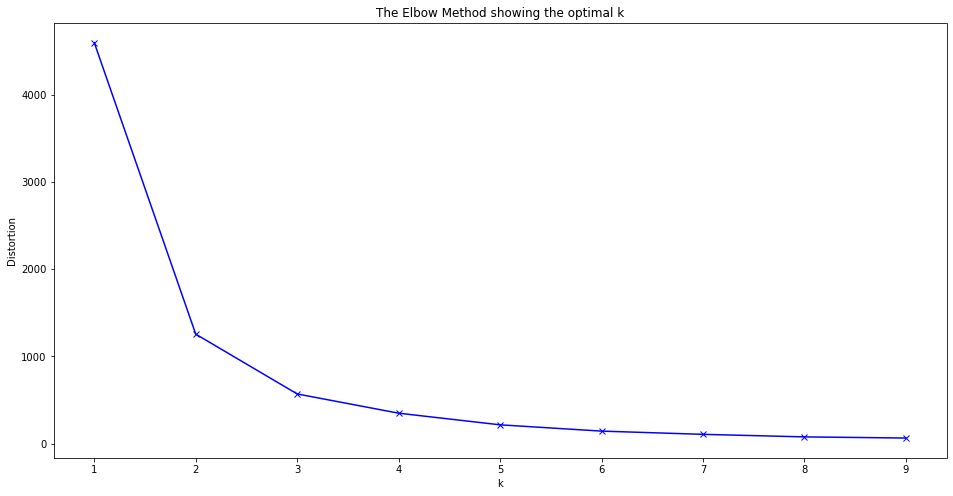

In [27]:
# Create a new dataframe and drop 'Neighbourhood name' 
# for only numerical values
venues_clustering = total_venues.drop('Neighbourhood Name', 1).copy(deep=True)
distortions = [] # Store results on distortions in a list
K = range(1, 10) # Initialize k
for k in K:
    kmeanModel = KMeans(n_clusters=k) # Initialize kMeans model
    kmeanModel.fit(venues_clustering) # Fit model to dataset
    distortions.append(kmeanModel.inertia_) # Append distortions to list for each k value
# use matplotlib to plot function
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
# KneeLocator is used to compute the point of inflection
# especially when it is difficult to locate the point of inflection from the curve above
from kneed import KneeLocator
kl = KneeLocator(range(1, 10),
                 distortions,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


## 8. Clustering Neighbourhoods by Total number of Essential Venues

The optimum number of clusters is from the Elbow method.Based on the number of essential venues, the neighbourhoods were grouped into 3 clusters using k-means algorithm 

In [29]:
# Run k-means clustering by initializing number of clusters and fitting the model
kmeans = KMeans(n_clusters=3, random_state=0).fit(venues_clustering)

# Add clustering labels to original dataframe
total_venues.insert(2, 'Cluster Labels', kmeans.labels_)

# Coppy the original geopandas dataframe
toronto_venues_map = toronto_gdf.copy(deep=True)

# Merge total_venues data with Geopandas dataframe, toronto_venues_map
toronto_venues_map = pd.merge(total_venues.set_index('Neighbourhood Name'),
                              toronto_venues_map,
                              how='outer',
                              on='Neighbourhood Name')

# The next line of code was used to fill in Cluster label values for the 2 neighbourhoods 
# that had no venues from Section 5. Venues in Cluster 0 had the least number of venues.
toronto_venues_map.fillna(value=0, inplace=True)
# Convert Cluster Labels and Total values to interger type
toronto_venues_map['Cluster Labels'] = toronto_venues_map[
    'Cluster Labels'].astype('int64')
toronto_venues_map['Total'] = toronto_venues_map['Total'].astype('int64')
toronto_venues_map.head() # Display first 5 rows

,Neighbourhood Name,Total,Cluster Labels,Neighbourhood ID,LONGITUDE,LATITUDE,Shape__Area,Shape__Length,geometry
0,Agincourt North,8,2,129,-79.27,43.81,"13,951,450.04","17,159.74","POLYGON ((-79.24213 43.80247, -79.24319 43.802..."
1,Agincourt South-Malvern West,17,1,128,-79.27,43.79,"15,117,359.77","21,320.85","POLYGON ((-79.25498 43.78122, -79.25797 43.780..."
2,Alderwood,1,0,20,-79.54,43.60,"9,502,179.58","12,667.01","POLYGON ((-79.54866 43.59022, -79.54876 43.590..."
3,Annex,5,2,95,-79.40,43.67,"5,337,191.83","10,513.88","POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
4,Banbury-Don Mills,4,0,42,-79.35,43.74,"19,248,965.98","25,141.57","POLYGON ((-79.33055 43.73979, -79.33044 43.739..."


## 9. Visualizing Toronto Neighbourhoods Clusters

Based on result of the clustering attempt described above, the 140 Toronto neighbourhoods were visualized with the aids of Sunburst and Choropleth Maps using Plotly Express.

In [30]:
# Obtain all Toronto districts from an exisitng dataset.
districts = pd.read_excel(r'C:\Users\Osas\Downloads\Data analysis\Capstone\Housing.xlsx',sheet_name='Sheet2')
# Drop Neighbourhood Name column
districts = districts.drop(labels='Neighbourhood Name', axis=1)
essential_venues = toronto_venues_map[['Neighbourhood Name', 'Neighbourhood ID', 'Total']].copy(deep=True)
essential_venues = essential_venues.rename(columns={'Total': 'Total Essential Venues'})
# Merge districts and essential venues dataframe
essential_venues = pd.merge(essential_venues, districts, on='Neighbourhood ID')
essential_venues.head()

,Neighbourhood Name,Neighbourhood ID,Total Essential Venues,District
0,Agincourt North,129,8,Scarborough
1,Agincourt South-Malvern West,128,17,Scarborough
2,Alderwood,20,1,Etobicoke
3,Annex,95,5,Old Toronto
4,Banbury-Don Mills,42,4,North York


### Sunburst Chart for Toronto Neighbourhoods and Districts
Using Plotly library. The chart is clickable to ex pand, explore districts.

In [32]:
venues_chart = px.sunburst(
    essential_venues,
    path=['District', 'Neighbourhood Name'],
    values='Total Essential Venues',
    title='Toronto Neighbourhoods and Districts showing Essential Venues',
    hover_name='Neighbourhood Name')

venues_chart.update_layout(margin=dict(t=40, l=0, r=0, b=0))
venues_chart.show()

### Analysis Neighbourhood Clusters based on Total number of Essential Venues

In [33]:
# Get the mean number of essential venues per cluster
temp5 = total_venues.groupby('Cluster Labels').mean().reset_index()
temp5.rename(columns={'Total':'Mean'},inplace=True)
temp5.head()

,Cluster Labels,Mean
0,0,1.81
1,1,19.36
2,2,7.59


We can see from the results above that Cluster 0 has the neighbourhoods with an average of 2 essential venues while Cluster 1 and 2 have 19 and 8 venues respectively.

In [34]:
print('Neighbourhoods in Cluster 2 have {}-{} venues'.format(
    total_venues.loc[total_venues['Cluster Labels'] == 2, 'Total'].min(),
    total_venues.loc[total_venues['Cluster Labels'] == 2, 'Total'].max()))
print('Neighbourhoods in Cluster 1 have {}-{} venues'.format(
    total_venues.loc[total_venues['Cluster Labels'] == 1, 'Total'].min(),
    total_venues.loc[total_venues['Cluster Labels'] == 1, 'Total'].max()))
print('Neighbourhoods in Cluster 2 have {}-{} venues'.format(
    total_venues.loc[total_venues['Cluster Labels'] == 0, 'Total'].min(),
    total_venues.loc[total_venues['Cluster Labels'] == 0, 'Total'].max()))

Neighbourhoods in Cluster 2 have 5-13 venues
Neighbourhoods in Cluster 1 have 14-28 venues
Neighbourhoods in Cluster 2 have 0-4 venues


### Neighbourhoods Venues Density Map
This plot was moved to the Final Map plot in [Section 12](#13.-Final-Results-and-Visualizations)

In [35]:
# Set index to Neighbourhood ID to match the index in the GeoJSON file created below
toronto_venues_map=toronto_venues_map.set_index('Neighbourhood ID')
# Rename column 'Cluster Labels' column to aid Visualization 
toronto_venues_map.rename(columns={'Cluster Labels': 'Venues Density'},
                          inplace=True)
# Change cluster label values to String values for better visualization
toronto_venues_map['Venues Density'] = toronto_venues_map[
    'Venues Density'].replace([0, 1, 2], ["Low", "High", "Mid"])

In [36]:
# Convert Geopandas to GeoJSON file for use on Plotly visualizations
toronto_json= toronto_gdf
toronto_json= toronto_json.set_index('Neighbourhood ID')
toronto_json = toronto_json.to_crs(epsg=4326) # convert the coordinate reference system to lat/long
toronto_json = toronto_json.__geo_interface__ 

## 10. Import and Clean Primary Benchmarks Datasets

The primary benchmarks are Unemployment, Crime and COVID-19 rates. These were in with excel or csv formats and were read in a Pandas dataframe.

### COVID-19 Rate Dataset

In [37]:
# Read dataframe into a Pandas dataframe
covid_rate = pd.read_excel(r'C:\Users\Osas\Downloads\Data analysis\Capstone\CityofToronto_COVID-19_NeighbourhoodData.xlsx',
                            sheet_name='All Cases and Rates by Neighbou')
# Drop missing values. This is of no consequence to our dataset
covid_rate.dropna(axis=0, inplace=True)
covid_rate = covid_rate.astype({"Neighbourhood ID": int})
# Extract relevant columns
cols = ['Neighbourhood Name', 'Neighbourhood ID', 'Rate per 100,000 people']
covid_rate = covid_rate[cols]
covid_rate.columns = ['Neighbourhood Name', 'Neighbourhood ID', 'Covid-19 Rate']
# Only Neighbourhood ID and COVID-19 rate were important as we do a merge operation later
covid_rate = covid_rate[['Neighbourhood ID', 'Covid-19 Rate']]
covid_rate.head()

,Neighbourhood ID,Covid-19 Rate
0,138,943.98
1,47,428.82
2,38,519.67
3,9,"1,017.06"
4,44,"1,048.65"


### Unemployment Rate Dataset
This dataset was part of a larger Census dataset as we will see below. I locate the exact row that had my data and used the row number to slice the dataframe.

In [38]:
# Import Census dataset
dem_data = pd.read_csv(r'C:\Users\Osas\Downloads\Data analysis\Capstone\Employment & Demographics - 2016.csv')
dem_data.head() # Display first 5 rows

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [39]:
# Obtain the row number for Unemployment rate to allow us extract it from the dataframe
dem_data.index[dem_data['Characteristic'] == 'Unemployment rate'].tolist()

[1890]

In [40]:
# Slice demographics dataframe to obtain Unemployment rates per Neighbourhood
emp_data=dem_data.iloc[lambda df: [0,1890], 4:]
emp_data.head()

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1890,Unemployment rate,8.2,9.8,9.8,6.1,6.7,7.2,7.2,10.2,7.7,8,5.5,11.4,8.8,8.8,12.7,8.5,8.7,8,8.2,10,8,7.2,6.6,7.6,8.5,8.7,6.1,9.7,7.2,6.2,6.9,9.6,9.7,7.2,7.9,7.5,8.2,6.1,10.8,10,8.9,7.4,7.9,10.6,7.4,5.6,11.5,7.2,7.9,10.3,7.1,6,8.5,8.3,7.4,9.6,10.2,7.1,8.8,7.3,5.6,8.6,9.1,8.2,9.9,7.5,7.6,10.9,7.2,6.4,7.5,6.9,6.4,7.1,10.5,8.1,6.2,9.5,6.2,11.4,6.9,10.8,12.1,6.9,6.7,8.7,8.8,8.4,4.5,5.3,10.4,14.6,6.8,10.1,5,6.8,9.2,6,6.4,10,6,9.6,10.9,9.2,6.7,6,8.2,5.1,9.1,13,8.6,6.5,8.3,9.5,6.7,9.1,11.5,5.7,10.4,12.6,6.1,8.3,10.1,5.2,11.6,9.6,9.2,10.6,8.5,9,8.5,9.8,8.5,10.6,7.7,6.6,5.2,6.9,5.9,10.7,8


In [41]:
# Drop irrelevant columns
emp_data.drop(labels='City of Toronto',axis=1, inplace=True)
emp_data.rename(columns={'Characteristic':'Neighbourhood Name'}, inplace=True)
# Set index and Transpose
emp_data=emp_data.set_index('Neighbourhood Name').T
emp_data.reset_index(inplace = True)
# Re-order columns
emp_data.columns = ['Neighbourhood Name', 'Neighbourhood ID', 'Unemployment Rate']
# Set Neighbourhood ID and Unemployment Rate to numeric type
emp_data['Neighbourhood ID']=emp_data['Neighbourhood ID'].apply(pd.to_numeric) 
emp_data['Unemployment Rate']=emp_data['Unemployment Rate'].apply(pd.to_numeric) 
emp_data.head()

,Neighbourhood Name,Neighbourhood ID,Unemployment Rate
0,Agincourt North,129,9.80
1,Agincourt South-Malvern West,128,9.80
2,Alderwood,20,6.10
3,Annex,95,6.70
4,Banbury-Don Mills,42,7.20


### Crime Rate Dataset

In [42]:
crime_data_raw = pd.read_csv(r'C:\Users\Osas\Downloads\Data analysis\Capstone\Neighbourhood Crime Rates.csv')
crime_data_raw.head()

,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry
0,1,16,South Parkdale,85,21849,202,226,231,229,220,251,226.50,0.14,"1,148.80",13,20,23,19,17,20,18.70,0.18,91.50,45,51,71,58,78,89,65.30,0.14,407.30,0,0,1,0,0,1,0.30,1.00,4.60,24,35,41,30,35,33,33.00,-0.06,151.00,6,4,9,10,9,22,10.00,1.44,100.70,"2,286,974.07","10,802.83","{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,2,17,South Riverdale,70,27876,215,207,236,243,304,261,244.30,-0.14,936.30,18,23,27,37,40,40,30.80,0.00,143.50,89,98,148,94,91,133,108.80,0.46,477.10,1,0,3,5,2,0,1.80,-1.00,0.00,64,42,49,64,40,35,49.00,-0.13,125.60,18,16,22,27,24,21,21.30,-0.13,75.30,"10,964,573.83","43,080.72","{u'type': u'Polygon', u'coordinates': (((-79.3..."
2,3,18,St.Andrew-Windfields,40,17812,53,41,48,45,55,58,50.00,0.05,325.60,15,25,10,15,21,35,20.20,0.67,196.50,81,79,57,91,81,83,78.70,0.02,466.00,1,0,0,2,0,0,0.50,0.00,0.00,8,5,14,0,4,12,7.20,2.00,67.40,10,14,8,7,6,6,8.50,0.00,33.70,"7,299,579.76","13,026.00","{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4,19,Taylor-Massey,61,15683,127,92,97,107,123,122,111.30,-0.01,777.90,11,9,7,5,12,12,9.30,0.00,76.50,31,71,43,27,41,63,46.00,0.54,401.70,0,1,1,1,0,1,0.70,1.00,6.40,24,37,16,20,16,13,21.00,-0.19,82.90,4,3,5,2,4,3,3.50,-0.25,19.10,"1,062,970.04","5,940.70","{u'type': u'Polygon', u'coordinates': (((-79.2..."
4,5,20,Humber Summit,21,12416,76,89,118,116,109,118,104.30,0.08,950.40,66,42,62,83,106,135,82.30,0.27,"1,087.30",54,44,41,40,56,57,48.70,0.02,459.10,0,1,0,2,1,3,1.20,2.00,24.20,22,23,23,27,31,28,25.70,-0.10,225.50,15,16,18,18,15,22,17.30,0.47,177.20,"7,966,905.40","12,608.57","{u'type': u'Polygon', u'coordinates': (((-79.5..."


In [43]:
crime_data = crime_data_raw.copy(deep=True)
# Assign variable name to list of relevant columns
col_list = ['Assault_2019', 'AutoTheft_2019', 'BreakandEnter_2019', 'Homicide_2019',
            'Robbery_2019', 'TheftOver_2019']
# Obtain Crime rate for each neighbourhood
crime_data['Crime_Rate'] = 100000 * (crime_data[col_list].sum(axis=1) /
                                     crime_data['Population'])
crime_data.head()

,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry,Crime_Rate
0,1,16,South Parkdale,85,21849,202,226,231,229,220,251,226.50,0.14,"1,148.80",13,20,23,19,17,20,18.70,0.18,91.50,45,51,71,58,78,89,65.30,0.14,407.30,0,0,1,0,0,1,0.30,1.00,4.60,24,35,41,30,35,33,33.00,-0.06,151.00,6,4,9,10,9,22,10.00,1.44,100.70,"2,286,974.07","10,802.83","{u'type': u'Polygon', u'coordinates': (((-79.4...","1,903.98"
1,2,17,South Riverdale,70,27876,215,207,236,243,304,261,244.30,-0.14,936.30,18,23,27,37,40,40,30.80,0.00,143.50,89,98,148,94,91,133,108.80,0.46,477.10,1,0,3,5,2,0,1.80,-1.00,0.00,64,42,49,64,40,35,49.00,-0.13,125.60,18,16,22,27,24,21,21.30,-0.13,75.30,"10,964,573.83","43,080.72","{u'type': u'Polygon', u'coordinates': (((-79.3...","1,757.78"
2,3,18,St.Andrew-Windfields,40,17812,53,41,48,45,55,58,50.00,0.05,325.60,15,25,10,15,21,35,20.20,0.67,196.50,81,79,57,91,81,83,78.70,0.02,466.00,1,0,0,2,0,0,0.50,0.00,0.00,8,5,14,0,4,12,7.20,2.00,67.40,10,14,8,7,6,6,8.50,0.00,33.70,"7,299,579.76","13,026.00","{u'type': u'Polygon', u'coordinates': (((-79.3...","1,089.15"
3,4,19,Taylor-Massey,61,15683,127,92,97,107,123,122,111.30,-0.01,777.90,11,9,7,5,12,12,9.30,0.00,76.50,31,71,43,27,41,63,46.00,0.54,401.70,0,1,1,1,0,1,0.70,1.00,6.40,24,37,16,20,16,13,21.00,-0.19,82.90,4,3,5,2,4,3,3.50,-0.25,19.10,"1,062,970.04","5,940.70","{u'type': u'Polygon', u'coordinates': (((-79.2...","1,364.53"
4,5,20,Humber Summit,21,12416,76,89,118,116,109,118,104.30,0.08,950.40,66,42,62,83,106,135,82.30,0.27,"1,087.30",54,44,41,40,56,57,48.70,0.02,459.10,0,1,0,2,1,3,1.20,2.00,24.20,22,23,23,27,31,28,25.70,-0.10,225.50,15,16,18,18,15,22,17.30,0.47,177.20,"7,966,905.40","12,608.57","{u'type': u'Polygon', u'coordinates': (((-79.5...","2,923.65"


In [44]:
# Extract only relevant columns from Crime dataset
cols=['Neighbourhood','Hood_ID','Crime_Rate']
crime_data=crime_data[cols]
crime_data.columns=['Neighbourhood Name', 'Neighbourhood ID', 'Crime Rate']
crime_data=crime_data[['Neighbourhood ID', 'Crime Rate']]
crime_data.head()

,Neighbourhood ID,Crime Rate
0,85,"1,903.98"
1,70,"1,757.78"
2,40,"1,089.15"
3,61,"1,364.53"
4,21,"2,923.65"


### Merge Primary Benchmarks Datasets

In [45]:
# Merge unemployment and crime data first with Neighbourhood ID as primary key
cluster_data=pd.merge(emp_data, crime_data, on=['Neighbourhood ID'])

In [46]:
# Merge above dataframe with COVID-19 dataset
cluster_data=pd.merge(cluster_data, covid_rate, on=['Neighbourhood ID'])
cluster_data.head()

,Neighbourhood Name,Neighbourhood ID,Unemployment Rate,Crime Rate,Covid-19 Rate
0,Agincourt North,129,9.80,735.07,542.71
1,Agincourt South-Malvern West,128,9.80,"1,384.85",479.86
2,Alderwood,20,6.10,730.05,696.86
3,Annex,95,6.70,"1,978.64",782.94
4,Banbury-Don Mills,42,7.20,797.98,314.14


## 11. Data Exploration (Part 2)

### Descriptive Statistics for Primary Benchmarks

In [47]:
# Get Descriptive stats of the dataframe
cluster_data.describe()

,Neighbourhood ID,Unemployment Rate,Crime Rate,Covid-19 Rate
count,140.00,140.00,140.00,140.00
mean,70.50,8.30,"1,378.40",913.01
std,40.56,1.90,797.68,584.55
min,1.00,4.50,504.18,236.47
25%,35.75,6.90,869.21,449.91
50%,70.50,8.20,"1,232.85",756.24
75%,105.25,9.62,"1,532.33","1,129.27"
max,140.00,14.60,"5,314.57","2,812.36"


Based on the dataframe above, we can see that the average Unemployment rate for City of Toronto is 8.3% for 2019. Average number of crimes committed per 100,000 people is 1378 and 1 in 100 persons has contracted COVID-19 as of October 2020.

### Bubble Plot for Primary Benchmarks

In [48]:
bubble_data = pd.merge(cluster_data,districts, on='Neighbourhood ID')
bubble_data.head()

,Neighbourhood Name,Neighbourhood ID,Unemployment Rate,Crime Rate,Covid-19 Rate,District
0,Agincourt North,129,9.80,735.07,542.71,Scarborough
1,Agincourt South-Malvern West,128,9.80,"1,384.85",479.86,Scarborough
2,Alderwood,20,6.10,730.05,696.86,Etobicoke
3,Annex,95,6.70,"1,978.64",782.94,Old Toronto
4,Banbury-Don Mills,42,7.20,797.98,314.14,North York


In [49]:
bubble_chart = px.scatter(bubble_data, # Dataframe
                        x="Unemployment Rate", # Column name for x-values
                        y="Covid-19 Rate", # Column name for y-values
                        size="Crime Rate", # column name for size of bubble
                        color="District", # Column name for Legend
                        hover_data=({
                        'Unemployment Rate': ':.2f', # Set the no. of decimal places
                        'Crime Rate': ':.2f',
                        'Covid-19 Rate': ':.2f'}),
                        hover_name="Neighbourhood Name",
                        size_max=45, # maximum bubble size
                        title='Exploring Toronto Neighbourhoods using Primary Benchmarks')
bubble_chart.update_layout(width=800,
                           height=600,
                           margin={"r": 0,"t": 75, "l": 0, "b": 0})
bubble_chart.show()

We can see that Neighbourhoods with highest crime rate are in Old Toronto while the neighbourhood with the highest unemployment rate is in Oakridge, Scarborough District. Hover on the plot and Click/Tap on the legend on the Bubble chart to isolate a district and explore further.

## 11. Clustering Neighbourhoods by Primary Benchmarks

### Determine Optimum Number of Clusters with Elbow Method

In [50]:
Cluster_data=cluster_data.copy(deep=True) # make a new dataframe for clustering
# Drop columns not required for the clustering algorithm
Clustering_1 = Cluster_data.drop(labels=['Neighbourhood Name','Neighbourhood ID'], axis=1)

# Use Elbow Method to get optimum number of clusters. Same process as used for Clustering in Section 8
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Clustering_1)
    distortions.append(kmeanModel.inertia_)

In [51]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [52]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clustering_1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1])

### Analyzing Neighbourhood Clusters based on Primary Benchmarks

In [53]:
# add clustering labels to original dataframe
Cluster_data.insert(2, 'Cluster Labels', kmeans.labels_)
Cluster_data.head()

,Neighbourhood Name,Neighbourhood ID,Cluster Labels,Unemployment Rate,Crime Rate,Covid-19 Rate
0,Agincourt North,129,1,9.80,735.07,542.71
1,Agincourt South-Malvern West,128,1,9.80,"1,384.85",479.86
2,Alderwood,20,1,6.10,730.05,696.86
3,Annex,95,1,6.70,"1,978.64",782.94
4,Banbury-Don Mills,42,1,7.20,797.98,314.14


In [54]:
# Get the mean rate of each Cluster
Cluster_data.groupby('Cluster Labels').mean()

,Neighbourhood ID,Unemployment Rate,Crime Rate,Covid-19 Rate
Cluster Labels,,,,
0,43.27,9.75,"1,648.58","1,942.23"
1,76.73,7.95,"1,169.51",669.09
2,76.20,8.42,"4,527.06",878.59


We can see from the above that Cluster 1 have the lowest primary benchmarks. This cluster was then used in the second clustering attempt using Secondary benchmark

### Visualizing Neighbourhood Clusters based on Primary Benchmarks

In [55]:
# Prepare bar-chart dataset. 
Bardata1=Cluster_data.groupby('Cluster Labels').count()
Bardata1.reset_index(inplace=True)
Bardata1=Bardata1[['Cluster Labels','Neighbourhood Name']] # Extract relevant columns for plot
Bardata1.columns=(['Cluster Labels','Total Neighbourhoods'])

# Change Cluster labels to categorical values for seamless visualization
Bardata1["Cluster Labels"] = pd.Categorical(Bardata1["Cluster Labels"], [1, 0, 2]) 
Bardata1.sort_values("Cluster Labels", inplace=True)
# Rename cluster labels based on outcome for easy visualization
Bardata1["Cluster Labels"]=Bardata1["Cluster Labels"].replace([1, 0, 2], 
           ["Low", "Mid", "High"])
Bardata1

,Cluster Labels,Total Neighbourhoods
1,Low,109
0,Mid,26
2,High,5


In [56]:
# Barchart for Clustering using Primary benchmarks done with Plotly Express
cluster_barchart = px.bar(Bardata1, x="Cluster Labels", y="Total Neighbourhoods",  color="Cluster Labels", 
                          text='Total Neighbourhoods', category_orders={"Cluster Labels": ["1", "0", "2"]})

    
cluster_barchart.update_xaxes(type='category')
cluster_barchart.update_layout(title = 'Clustering Distribution using Primary Benchmarks',
                         margin={"r":0,"t":30,"l":0,"b":0})
cluster_barchart.show()

## 12. Clustering using Secondary Benchmark (Housing Prices)

Using the outcome of the clustering attempt in Section 11, the 109 neighbourhoods in the Low Cluster were further grouped based on their Housing prices (for one-bedroom apartment). The Housing prices were considered as secondary benchmark. The outcome of this final clustering attempt was used to generate the final Neighbourhood Desirability Index.

In [57]:
# Create a new dataframe for Neighbourhoods in the "Low" Cluster from section 11
BestCluster=Cluster_data[Cluster_data['Cluster Labels'] == 1].copy(deep=True)
# Extract only relevant columns
Best_Cluster=BestCluster.drop(columns=['Cluster Labels', 'Unemployment Rate', 'Crime Rate','Covid-19 Rate'])
Best_Cluster.head()

,Neighbourhood Name,Neighbourhood ID
0,Agincourt North,129
1,Agincourt South-Malvern West,128
2,Alderwood,20
3,Annex,95
4,Banbury-Don Mills,42


### Housing Prices Dataset

In [58]:
housing=pd.read_excel(r'C:\Users\Osas\Downloads\Data analysis\Capstone\Housing.xlsx',sheet_name='Sheet1')
housing.head()

,Neighbourhood ID,Neighbourhood Name,Median Rent
0,129,Agincourt North,"$1,750"
1,128,Agincourt South-Malvern West,"$1,750"
2,20,Alderwood,"$1,750"
3,95,Annex,$949
4,42,Banbury-Don Mills,$949


In [59]:
# Remove the $ for the Rent column and drop the Neighbourhood Name column
housing['Median Rent']=housing['Median Rent'].replace('[\$,]', '', regex=True).astype(float)
housing.drop(columns=['Neighbourhood Name'], inplace=True)
# Merge with Best Cluster dataframe
Best_Cluster=Best_Cluster.merge(housing,on=['Neighbourhood ID'])
Best_Cluster.head()

,Neighbourhood Name,Neighbourhood ID,Median Rent
0,Agincourt North,129,"1,750.00"
1,Agincourt South-Malvern West,128,"1,750.00"
2,Alderwood,20,"1,750.00"
3,Annex,95,949.00
4,Banbury-Don Mills,42,949.00


### Determine Optimum Number of Clusters with Elbow Method

In [60]:
Clustering_2 = Best_Cluster.drop(labels=['Neighbourhood Name','Neighbourhood ID'], axis=1)
distortions2 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Clustering_2)
    distortions2.append(kmeanModel.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), distortions2, curve="convex", direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [61]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clustering_2)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 0, 0, 2, 1, 1, 2, 2])

### Analyzing Neighbourhood Clusters based on Secondary Benchmark

In [62]:
# Insert Cluster labels to original dataframe
Best_Cluster.insert(2, 'Cluster Labels', kmeans.labels_)
Best_Cluster.head()

,Neighbourhood Name,Neighbourhood ID,Cluster Labels,Median Rent
0,Agincourt North,129,2,"1,750.00"
1,Agincourt South-Malvern West,128,2,"1,750.00"
2,Alderwood,20,2,"1,750.00"
3,Annex,95,0,949.00
4,Banbury-Don Mills,42,0,949.00


In [63]:
Best_Cluster.groupby('Cluster Labels').mean()

,Neighbourhood ID,Median Rent
Cluster Labels,,
0,73.86,990.57
1,70.40,"2,070.25"
2,78.52,"1,700.07"


From the dataframe above, we can see that neighbourhoods in Cluster 0 have the lowest housing prices while neighbourhoods in Cluster 2 and 1 are the mid and high range respectively.

In [64]:
# For better visualization, replace Cluster label values 1 and 2 so that they are in ascending order
Best_Cluster['Cluster Labels']=Best_Cluster['Cluster Labels'].replace(to_replace=[1,2], value=[2,1])
Best_Cluster.head()

,Neighbourhood Name,Neighbourhood ID,Cluster Labels,Median Rent
0,Agincourt North,129,1,"1,750.00"
1,Agincourt South-Malvern West,128,1,"1,750.00"
2,Alderwood,20,1,"1,750.00"
3,Annex,95,0,949.00
4,Banbury-Don Mills,42,0,949.00


### Visualizing Neighbourhood Clusters based on Secondary Benchmarks

In [65]:
# Group neighbourhoods from Clustering attempt with Secondary benchmark
Bardata2=Best_Cluster.copy(deep=True)
Bardata2=Best_Cluster.groupby('Cluster Labels').count()
Bardata2.reset_index(inplace=True)
Bardata2=Bardata2[['Cluster Labels','Neighbourhood Name']]
# Rename columns
Bardata2.columns=(['Cluster Labels','Total Neighbourhoods'])
# Rename cluster labels
Bardata2["Cluster Labels"]=Bardata2["Cluster Labels"].replace([0, 1, 2], 
           ["Low", "Mid", "High"])
Bardata2

,Cluster Labels,Total Neighbourhoods
0,Low,7
1,Mid,82
2,High,20


In [66]:
# Bar chart from Clustering using Secondary benchmark
cluster_barchart2 = px.bar(Bardata2, x="Cluster Labels", y="Total Neighbourhoods",  color="Cluster Labels", 
                          text='Total Neighbourhoods', category_orders={"Cluster Labels": ["0", "1", "2"]})
              
cluster_barchart2.update_xaxes(type='category')
cluster_barchart2.update_layout(title = 'Clustering Distribution of "Best" Neighbourhoods using Housing Prices',
                         margin={"r":0,"t":30,"l":0,"b":0})
cluster_barchart2.show()

## 13. Final Results and Visualizations

The results from the second clustering attempt in Secction 12 were used to rank the neighbourhoods into 4 categories. The neighbourhoods that belonged to the “Mid” and “High” clusters using _primary benchmarks_ were classified as the **_Least desirable_** neighbourhoods while those with "Low", "Mid" and "High" clusters using housing prices were classified as **_Most Desirable, Desirable and Semi-Desirable_** respectively.

In [67]:
# Get results from clustering attempts using secondary benchmark in a new datframe
Best_Cluster1=Best_Cluster[['Neighbourhood ID','Cluster Labels']].copy(deep=True)
# Create a copy of the Geopandas dataframe to help with final map visualization
housing_map=toronto_gdf.copy(deep=True)
# Join the Best_Cluster1 with the Geopandas dataframe
housing_map = housing_map.join(Best_Cluster1.set_index('Neighbourhood ID'), on='Neighbourhood ID')
# Set index to Neighbourhood ID. This is helpful for map visualizations
housing_map=housing_map.set_index('Neighbourhood ID')
# For neighbourhoods in Mid and High Clusters from Section 11, they will have NaN values
# The NaN values are now replaced with number 3 so they become the 4 clusters
housing_map['Cluster Labels']=housing_map['Cluster Labels'].fillna(value=3)
# Rename Cluster Labels column
housing_map.rename(columns={'Cluster Labels': 'Neighbourhood Desirability Index'},inplace=True)
# Change column data type
housing_map['Neighbourhood Desirability Index']=housing_map['Neighbourhood Desirability Index'].astype('int64')
housing_map.head()

,Neighbourhood Name,LONGITUDE,LATITUDE,Shape__Area,Shape__Length,geometry,Neighbourhood Desirability Index
Neighbourhood ID,,,,,,,
94,Wychwood,-79.43,43.68,"3,217,959.61","7,515.78","POLYGON ((-79.43592 43.68015, -79.43492 43.680...",1
100,Yonge-Eglinton,-79.40,43.70,"3,160,333.99","7,872.02","POLYGON ((-79.41096 43.70408, -79.40962 43.704...",1
97,Yonge-St.Clair,-79.40,43.69,"2,222,464.27","8,130.41","POLYGON ((-79.39119 43.68108, -79.39141 43.680...",1
27,York University Heights,-79.49,43.77,"25,418,210.12","25,632.34","POLYGON ((-79.50529 43.75987, -79.50488 43.759...",3
31,Yorkdale-Glen Park,-79.46,43.71,"11,566,687.56","13,953.41","POLYGON ((-79.43969 43.70561, -79.44011 43.705...",3


### Final distribution of Toronto Neighbourhoods

In [68]:
# Show distribution of all neighbourhoods
hist_data=housing_map.copy(deep=True)
hist_data['Neighbourhood Desirability Index']=hist_data['Neighbourhood Desirability Index'].replace([0, 1, 2, 3], 
           ["Most Desirable","Desirable","Semi-Desirable","Least Desirable"])
# I used the historgram type here because I wanted it to automatically compute the count for each category
Hist = px.histogram(hist_data, x="Neighbourhood Desirability Index", color = "Neighbourhood Desirability Index", 
                   title ='Distribution of Toronto Neighbourhoods based on Desirabilty Index')
Hist.update_yaxes(title_text='Total Neighbourhoods', title_standoff=1)
Hist.show()

From the plot above, we can see that only 7 neighbourhoods fell into the **Most Desirable index** rank while about 59% of the Toronto neighbourhoods were grouped into the **Desirable** category based on their medium housing prices and relatively low crime, COVID-19 and Crime rates. 

### Merging Essential Venues and Neighbourhood Desirability Index Datasets

In order to satisfy my curiosity, I wanted to know if neighbourhoods that had high number of *essential venues* were also in the *Most Desirable/Desirable* Category. This was achieved with the lines of code below.

In [75]:
options = [0,1] 

df1=housing_map[housing_map['Neighbourhood Desirability Index'].isin(options)]

df2=total_venues.sort_values(by=['Total'], ascending=False).head(20)

result= pd.merge(df1, df2, how='inner', on=['Neighbourhood Name'])
result=result.sort_values(by=['Total'], ascending=False)
result['Neighbourhood Desirability Index']=result['Neighbourhood Desirability Index'].replace([0, 1], 
           ["Most Desirable","Desirable"])
cols=['Neighbourhood Name', 'Neighbourhood Desirability Index', 'Total']
result = result[cols]
result

,Neighbourhood Name,Neighbourhood Desirability Index,Total
3,Mount Pleasant West,Desirable,28
1,Yonge-St.Clair,Desirable,23
10,Greenwood-Coxwell,Desirable,20
4,Playter Estates-Danforth,Desirable,19
2,Lawrence Park North,Desirable,17
6,Agincourt South-Malvern West,Desirable,17
9,Dufferin Grove,Desirable,17
7,Cabbagetown-South St. James Town,Desirable,16
0,Yonge-Eglinton,Desirable,15
5,The Beaches,Desirable,12


We can see that none of the neighbourhoods with high venue density fell into the Most Desirable Category. This is expected because with proximity to essential venues, housing prices increase. However, some of the neighbourhoods fell into the desirable category as seen above. 

### Final Toronto Neighbourhoods Map
This map merged the two outcomes i.e. **'Neighbourhood Desirability Index' and "Venues Density"** with all the major datasets into one choropleth map. This was achieved using the line of code below

#### Defining Colour Scale for Discrete Neighbourhood Desirability Index and Venues Density Maps
Due to the nature of Plotly library, we cannot define or customize colour bars for categorical variables on the Choropleth Graph Objects trace. Thanks to research, I learned the code below from *Kyle Pastor's* Medium article on how to create a colour scale for discrete/categorical variables and use on Plotly Graph objects. P.S. I had done the plots using Plotly Express and it worked fine with the categorical variables but for some reason, Graph objects does not allow this.

In [76]:
def generateDiscreteColourScale(colour_set):
    #colour set is a list of lists
    colour_output = []
    num_colours = len(colour_set)
    divisions = 1./num_colours
    c_index = 0.
    # Loop over the colour set
    for cset in colour_set:
        num_subs = len(cset)
        sub_divisions = divisions/num_subs
        # Loop over the sub colours in this set
        for subcset in cset:
            colour_output.append((c_index,subcset))
            colour_output.append((c_index + sub_divisions-
                .001,subcset))
            c_index = c_index + sub_divisions
    colour_output[-1]=(1,colour_output[-1][1])
    return colour_output

color_schemes = [
    ['rgb(254,224,210)'],
    ['rgb(244,165,130)'],
    ['rgb(214,96,77)'],
    ['rgb(178,24,43)']
]

color_schemes2 = [
    ['rgb(254,196,79)'] ,
    ['rgb(254,153,41)'],
    ['rgb(204,76,2)']
]
colorscale = generateDiscreteColourScale(color_schemes) # Colour scheme for Neighbourhood Desirability Index map
colorscale2 = generateDiscreteColourScale(color_schemes2) # Colour scehme for Venues Denisty Map

#### Essential Venues Dataset

In [77]:
# Copy original dataframe
venuesmap=toronto_venues_map.copy(deep=True)
# Convert the categorical values from earlier to numerical values to allow us visualize on the choropleth map
venuesmap['Venues Density']=venuesmap['Venues Density'].replace(["Low","Mid","High"],[0, 1, 2])

#### Primary Benchmarks Dataset 

In [78]:
# Copy orignal dataframe
cluster_map=cluster_data.copy(deep=True)
# Rename Columns. This is not necessary
cluster_map.columns=['Neighbourhood_Name','Neighbourhood ID','Unemployment_Rate','Crime_Rate','Covid_19_Rate']
# Set index to Neighbourhood ID. Same as GeoJSON dataset
cluster_map=cluster_map.set_index('Neighbourhood ID')

### Final Choropleth Map 

This was done using Plotly Graph Objects library. I also added dropdown lists for all the datasets and for various Map styles.

In [ ]:
# Initialize Layout
final_map = go.Figure()

# Add Traces

# Add the 1st trace for Neighbourhood Desirability Index
final_map.add_trace(
    go.Choroplethmapbox(
        geojson=toronto_json, # GeoJSON file
        locations=housing_map.index, #index needs to be same as id element of GeoJSON
        z=housing_map['Neighbourhood Desirability Index'], # set colour value
        text=housing_map['Neighbourhood Name'], # sets the hover information for each datapoint
        colorbar=dict(thickness=20, # sets attributes for the colour scale
                      ticklen=3,
                      outlinewidth=0,
                      title="Neighbourhood Desirability Index", # title of colour bar
                      tickmode='array',
                      nticks=4,
                      tickvals=[0.2, 1, 2, 2.8], # set tick values that need to be renamed
                      ticktext=[ "Most Desirable", "Desirable", "Semi-Desirable",
                          "Least Desirable"]), # set tick text to replace tick values
        marker_line_width=1,
        marker_opacity=0.7,
        colorscale=colorscale,  # set colourscale that was defined
        hovertemplate="<b>%{text}</b><br>" + "Desirability Index: %{z}<br>" +
        "<extra></extra>", # sets the text format shown when you hover over each shape
        visible=True)) # plot will be visible upon rendering

# Add the 2nd trace for Unemployment Rate
final_map.add_trace(
    go.Choroplethmapbox(
        geojson=toronto_json,  #GeoJSON
        locations=cluster_map.index, #index needs to be same as id element of GeoJSON 
        z=cluster_map.Unemployment_Rate,  #sets the color value
        text=cluster_map.Neighbourhood_Name,  #sets text for each shape
        colorbar=dict(thickness=20,
                      ticklen=3,
                      outlinewidth=0,
                      title="Unemployment Rate", # title of colour bar
                      ticksuffix='%'),  #adjusts the format of the colorbar
        marker_line_width=1,
        marker_opacity=0.7,
        colorscale="Viridis_r",  # set colour scale
        hovertemplate="<b>%{text}</b><br>" + "Unemployment Rate: %{z}<br>" +
        "<extra></extra>", # sets the text format shown when you hover over each shape
        visible=False))  # plot will not be visible upon rendering

# Add the 3rd trace for Crime rate
final_map.add_trace(
    go.Choroplethmapbox(
        geojson=toronto_json,
        locations=cluster_map.index,  
        z=cluster_map.Crime_Rate,
        text=cluster_map.Neighbourhood_Name,
        colorbar=dict(thickness=20,
                      ticklen=3,
                      outlinewidth=0,
                      title="Crime Rate"),
        marker_line_width=1,
        marker_opacity=0.7,
        colorscale="YlOrRd",
        hovertemplate="<b>%{text}</b><br>" + "Crime Rate: %{z}<br>" +
        "<extra></extra>",
        visible=False))

# Add the 4th trace for COVID_19 rate
final_map.add_trace(
    go.Choroplethmapbox(
        geojson=toronto_json,
        locations=cluster_map.
        index,
        z=cluster_map.Covid_19_Rate,
        text=cluster_map.Neighbourhood_Name,
        colorbar=dict(
            thickness=20, ticklen=3, outlinewidth=0,
            title="Covid-19 Rate"),
        marker_line_width=1,
        marker_opacity=0.7,
        colorscale="ice_r",
        hovertemplate="<b>%{text}</b><br>" + "Covid-19 Rate: %{z}<br>" +
        "<extra></extra>",
        visible=False))

# Add the 5th trace for Essential Venues Density
final_map.add_trace(
    go.Choroplethmapbox(
        geojson=toronto_json,
        locations=venuesmap.index,
        z=venuesmap['Venues Density'],
        text=venuesmap['Neighbourhood Name'],
        colorbar=dict(thickness=20,
                      ticklen=3,
                      outlinewidth=0,
                      title="Venues Density",
                      tickmode='array',
                      nticks=4,
                      tickvals=[0.2, 1, 1.8],
                      ticktext=["Low", "Mid", "High"]),
        marker_line_width=1,
        marker_opacity=0.7,
        colorscale=colorscale2,  # set colourscale that was defined
        hovertemplate="<b>%{text}</b><br>" + "Desirability Index: %{z}<br>" +
        "<extra></extra>",
        visible=False))

# Create drop-down menus for all the datasets
final_map.update_layout(
    updatemenus=[
        dict(
            type="dropdown",  # Create type of menu
            direction="down", # Create direction of dropdown menu
            showactive=True, # Show the selected label
            x=0.75,          # Set up horizontal position of the menu
            xanchor="left", # refernce point for x position
            y=1.0,         # Set up vertical position of the menu
            yanchor="top", # Reference point for y position
            buttons=list([
                dict(label="Desirability Index", # Sets the Menu Option label
                     method="update", # updates the entire plot
                     args=[{
                         "visible": [True, False, False, False, False] # Sets the visibility when menu option is selected
                     }, {
                         "title": "Toronto Neighbourhoods Desirability Index"
                     }]),
                dict(label="Unemployment Rate",
                     method="update",
                     args=[{
                         "visible": [False, True, False, False, False]
                     }, {
                         "title":
                         "Unemployment Rate in Toronto Neighbourhoods"
                     }]),
                dict(
                    label="Crime Rate",
                    method="update",
                    args=[{
                        "visible": [False, False, True, False, False]
                    }, {
                        "title":
                        "Crime Rate in Toronto Neighbourhoods (per 100,000 people)"
                    }]),
                dict(
                    label="Covid-19 Rate",
                    method="update",
                    args=[{
                        "visible": [False, False, False, True, False]
                    }, {
                        "title":
                        "Covid-19 Rate in Toronto Neighbourhoods (per 100,000 people)"
                    }]),
                dict(label="Venues Density",
                     method="update",
                     args=[{
                         "visible": [False, False, False, False, True]
                     }, {
                         "title": "Toronto Neighbourhoods Venue Density"
                     }]),
                dict(label="Clear All",
                     method="update",
                     args=[{
                         "visible": [False, False, False, False, False]
                     }, {
                         "title": "Toronto Neighbourhoods"
                     }])
            ])),
 
        
# Menu options for Map styles
        
        dict(type="dropdown",
             direction="up",
             showactive=True,
             x=0.75,
             xanchor='left',
             y=0.0,
             yanchor='bottom',
             buttons=list([
                 dict(args=['mapbox.style', 'dark'],
                      label='Dark',
                      method='relayout'),
                 dict(args=['mapbox.style', 'light'],
                      label='Light',
                      method='relayout'),
                 dict(args=['mapbox.style', 'satellite'],
                      label='Satellite',
                      method='relayout'),
                 dict(args=['mapbox.style', 'streets'],
                      label='Streets',
                      method='relayout')
             ]))
    ],
    title={
        'text': f"Toronto Neighbourhoods Desirability Index", # Inital plot title
        'font': {'size': 20},
        'xanchor': 'left'}, 
    mapbox1=dict(domain={'x': [0, 1], 'y': [0, 1]},
                 center=dict(lat=tor_lat, lon=tor_lon),
                 accesstoken=MAPBOX_ACCESSTOKEN,
                 zoom=9.5,
                 bearing=-12),
    margin=dict(l=0, r=0, t=40, b=0))

final_map.show()